# Tobacco Plant Disease Prediction

## Importing libraries

In [1]:
# Importing the TensorFlow library for machine learning tasks.
import tensorflow as tf
# Importing the Matplotlib library for data visualization.
import matplotlib.pyplot as plt
# Importing the Pandas library for data manipulation and analysis.
import pandas as pd
# Importing the Seaborn library for statistical data visualization.
import seaborn as sns
# Importing the os module for interacting with the operating system.
import os  
# Importing the random module for generating random numbers.
import random  
# Importing the time module for time-related operations.
import time  
# Importing a function for plotting Keras models.
from tensorflow.keras.utils import plot_model  
# Importing the Support Vector Classifier from Scikit-learn.
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score

## Data Collection And Preprocessing

### Training Data Dataset - Data Collection and Preprocessing

In [2]:
# Load the training and validation sets
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 1692 files belonging to 5 classes.


## Counting Images in Training Set

In [3]:
# Get the input path for the training set
input_path = training_set.file_paths

# Get the class names
class_names = training_set.class_names

# Count the number of images in each class
class_counts = {}
for class_name in class_names:
    class_path = os.path.join('train', class_name)
    class_count = len(os.listdir(class_path))
    class_counts[class_name] = class_count

total_images = 0
for class_name, count in class_counts.items():
    print(f"Class '{class_name}': {count} images")
    total_images += count

print(f"Total images: {total_images}")

Class 'Tobacco___AlternariaLeafSpot_Virus': 339 images
Class 'Tobacco___Black_Shack': 339 images
Class 'Tobacco___Healthy': 339 images
Class 'Tobacco___Mosaic_Virus': 339 images
Class 'Tobacco___Potato_Virus': 336 images
Total images: 1692


In [4]:
## Displaying Sample Images in Training Set

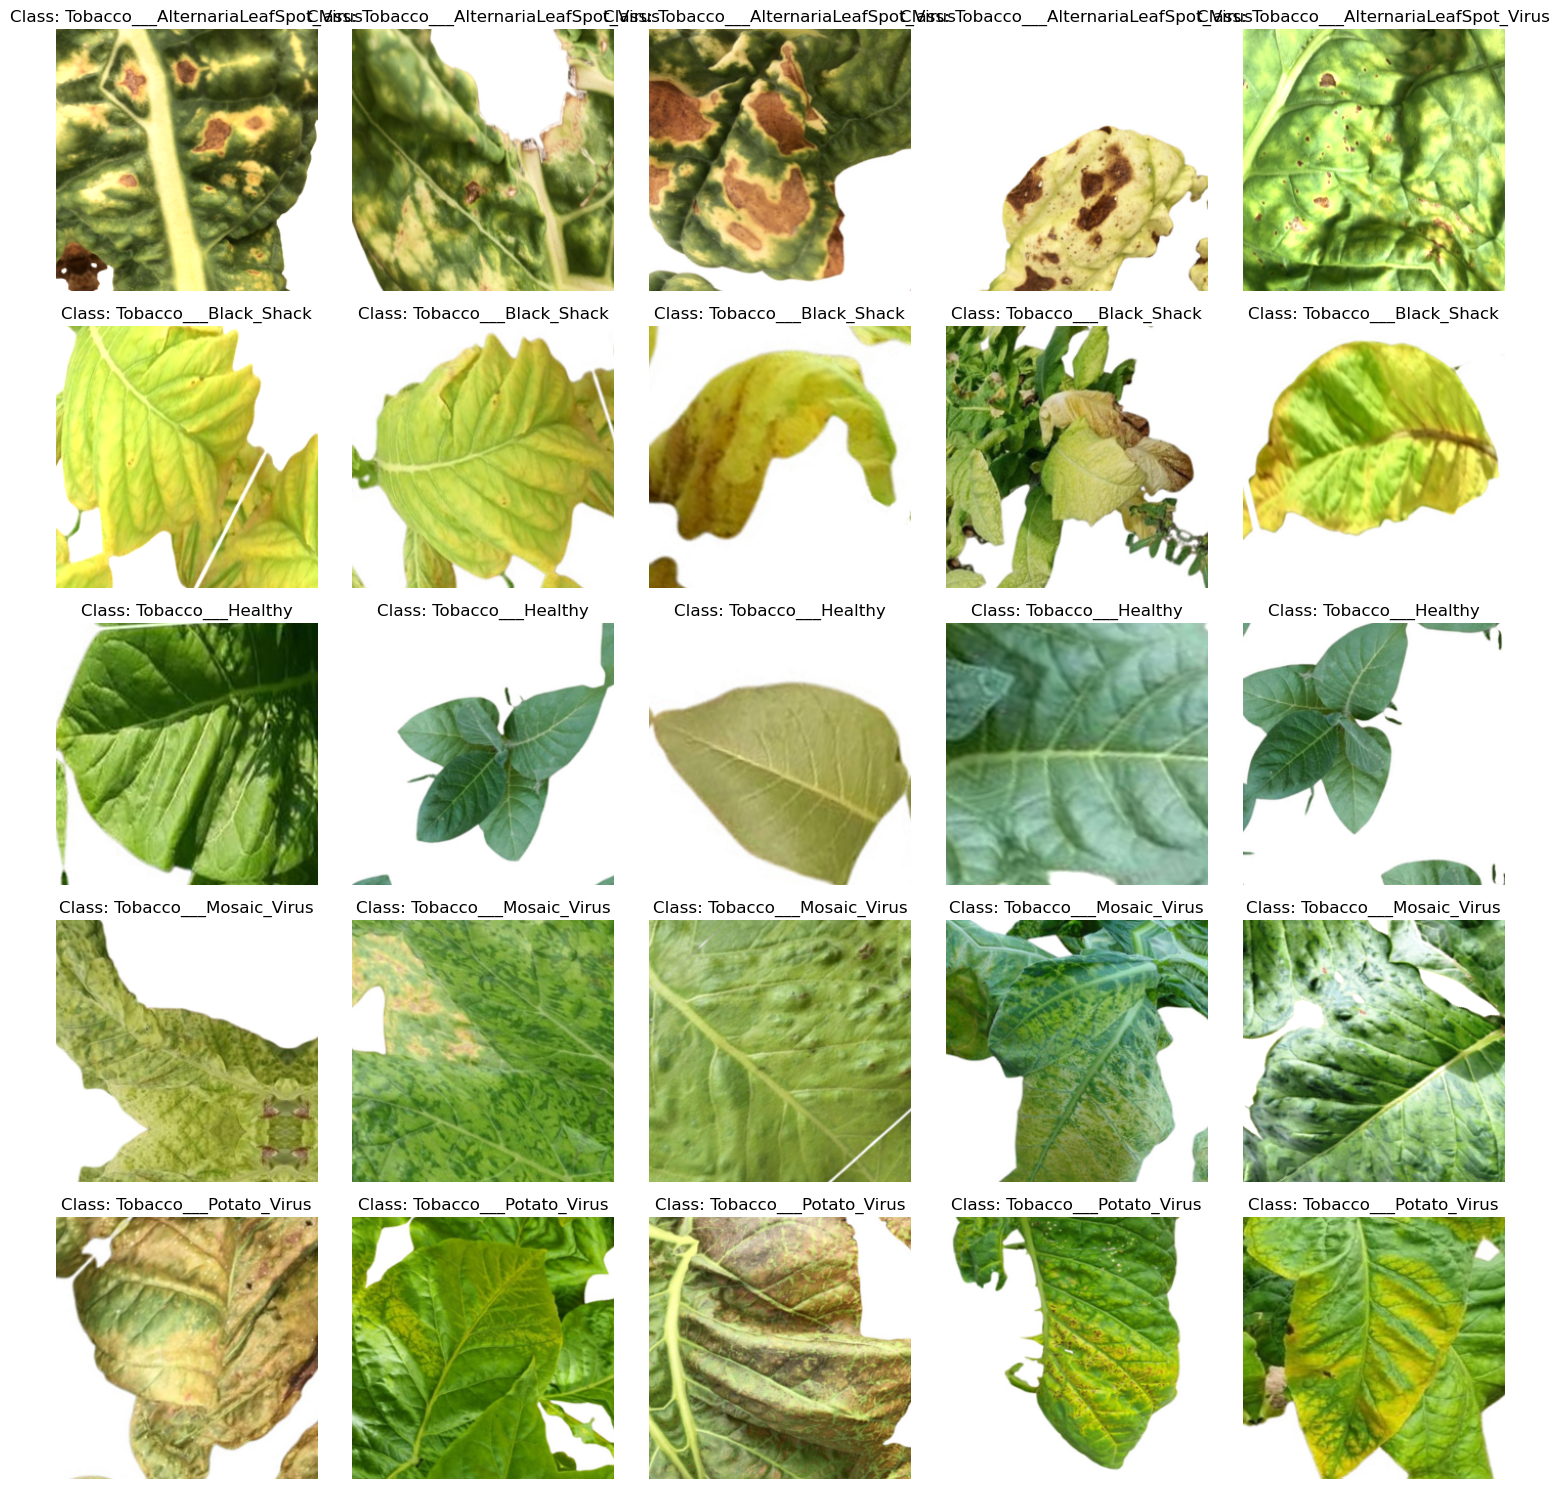

In [5]:
# Get the input path for the training set
input_path = training_set.file_paths

# Get the class names
class_names = training_set.class_names

# Display 5 images of each class
fig, axes = plt.subplots(5, 5, figsize=(15, 15))

for i, class_name in enumerate(class_names):
    class_path = os.path.join('train', class_name)
    class_images = os.listdir(class_path)
    sample_images = random.sample(class_images, 5)
    
    for j, image_name in enumerate(sample_images):
        image_path = os.path.join(class_path, image_name)
        image = plt.imread(image_path)
        axes[i, j].imshow(image)
        axes[i, j].set_title(f"Class: {class_name}")
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

### Validation DataSet - Data Collection and PreProcessing

In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 450 files belonging to 5 classes.


## Counting Images in Valid Set

In [7]:
# Get the input path for the training set
input_path = training_set.file_paths

# Get the class names
class_names = training_set.class_names

# Count the number of images in each class
class_counts = {}
for class_name in class_names:
    class_path = os.path.join('valid', class_name)
    class_count = len(os.listdir(class_path))
    class_counts[class_name] = class_count

# Print the class counts
for class_name, count in class_counts.items():
    print(f"Class '{class_name}': {count} images")
    total_images += count

Class 'Tobacco___AlternariaLeafSpot_Virus': 90 images
Class 'Tobacco___Black_Shack': 90 images
Class 'Tobacco___Healthy': 90 images
Class 'Tobacco___Mosaic_Virus': 90 images
Class 'Tobacco___Potato_Virus': 90 images


## BUILDING MODEL

### Building Convolution Layer - ALGORITHM ARCHITECTURE

In [8]:
# Create the CNN model
cnn = tf.keras.models.Sequential()

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [12]:
cnn.add(Dense(units=5, activation='softmax'))

In [13]:
## Compiling and Training Phase

## CNN HYPERPARAMETER TUNING

In [14]:
# Compile the CNN model
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    decay=0.0005,
    amsgrad=False),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [16]:
# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Metric to monitor for early stopping
    patience=3,           # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore the weights of the best epoch
)

In [17]:
start_time = time.time()
# Fit the model with early stopping
training_history = cnn.fit(
    x=training_set,
    validation_data=validation_set,
    epochs=15,
    callbacks=[early_stopping]  # Pass the early stopping callback
)
end_time = time.time()

total_time = end_time - start_time
training_time_minutes = total_time / 60

print(f"Total training time: {training_time_minutes:.2f} minutes")

Epoch 1/15


53/53 [==============================] - 140s 2s/step - loss: 1.6252 - accuracy: 0.3457 - val_loss: 1.1143 - val_accuracy: 0.5556
Epoch 2/15
53/53 [==============================] - 124s 2s/step - loss: 1.0884 - accuracy: 0.5337 - val_loss: 0.9401 - val_accuracy: 0.5600
Epoch 3/15
53/53 [==============================] - 111s 2s/step - loss: 0.9154 - accuracy: 0.5981 - val_loss: 0.9583 - val_accuracy: 0.5511
Epoch 4/15
53/53 [==============================] - 112s 2s/step - loss: 0.8114 - accuracy: 0.6661 - val_loss: 0.8139 - val_accuracy: 0.6311
Epoch 5/15
53/53 [==============================] - 108s 2s/step - loss: 0.7081 - accuracy: 0.7063 - val_loss: 0.8653 - val_accuracy: 0.6067
Epoch 6/15
53/53 [==============================] - 109s 2s/step - loss: 0.5946 - accuracy: 0.7612 - val_loss: 0.9241 - val_accuracy: 0.6111
Epoch 7/15
53/53 [==============================] - 108s 2s/step - loss: 0.5616 - accuracy: 0.7665 - val_loss: 0.6973 - val_accuracy: 0.7067
Epoch 8/15


## Loss Gradient Graph

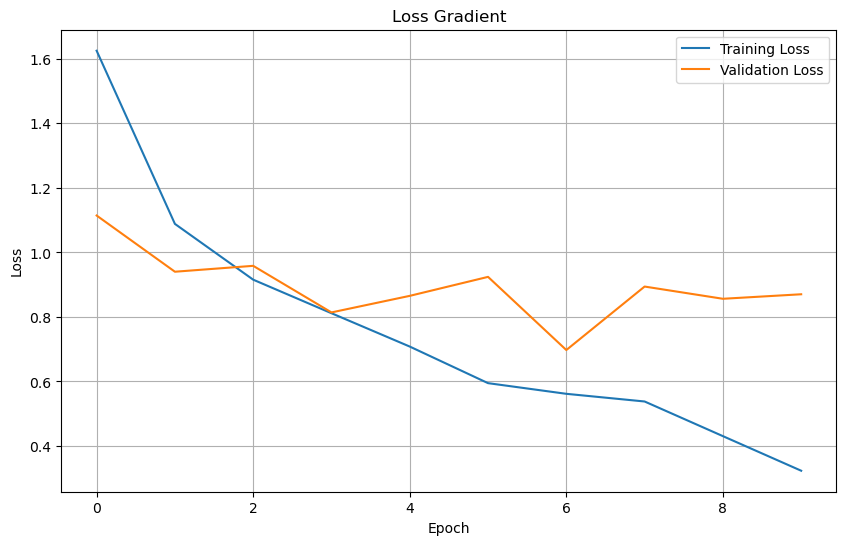

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Gradient')
plt.legend()
plt.grid(True)
plt.show()

## CNN MODEL EVALUATION

## CNN TRAINING ACCURACY

In [19]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

53/53 [==============================] - 26s 476ms/step - loss: 0.4321 - accuracy: 0.8363
Training accuracy: 0.8362883925437927


## CNN VALIDATION ACCURACY

In [20]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

15/15 [==============================] - 9s 439ms/step - loss: 0.6973 - accuracy: 0.7067
Validation accuracy: 0.7066666483879089


## CNN SAVING MODEL

In [21]:
cnn.save('trained_plant_disease_model.keras')

In [22]:
training_history.history #Return Dictionary of history

{'loss': [1.6251899003982544,
  1.0883592367172241,
  0.9154145121574402,
  0.8114191889762878,
  0.7080530524253845,
  0.5946391224861145,
  0.5615770816802979,
  0.5377898216247559,
  0.43040016293525696,
  0.323170006275177],
 'accuracy': [0.34574466943740845,
  0.533687949180603,
  0.5981087684631348,
  0.6660756468772888,
  0.7062647938728333,
  0.7612293362617493,
  0.7665484547615051,
  0.7801418304443359,
  0.8368794322013855,
  0.8729314208030701],
 'val_loss': [1.1143088340759277,
  0.9400678277015686,
  0.9583433866500854,
  0.8139204978942871,
  0.8652795553207397,
  0.9241186380386353,
  0.6973459124565125,
  0.8940913677215576,
  0.856193482875824,
  0.8701913952827454],
 'val_accuracy': [0.5555555820465088,
  0.5600000023841858,
  0.551111102104187,
  0.6311110854148865,
  0.6066666841506958,
  0.6111111044883728,
  0.7066666483879089,
  0.6555555462837219,
  0.6800000071525574,
  0.6688888669013977]}

In [23]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [24]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## CNN ACCURACY VISUALISATION

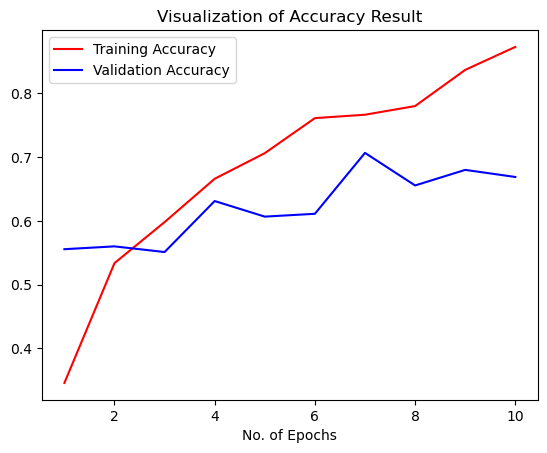

In [25]:
epochs = range(1, len(training_history.history['accuracy']) + 1)

plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## TESTING SET

In [26]:
class_name = validation_set.class_names

In [27]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 450 files belonging to 5 classes.


In [28]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

450/450 [==============================] - 18s 38ms/step


In [29]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [30]:
Y_true

<tf.Tensor: shape=(450,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
     

In [31]:
predicted_categories

<tf.Tensor: shape=(450,), dtype=int64, numpy=
array([4, 1, 4, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 1, 3, 3, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3,
       2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
     

In [32]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [33]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                    precision    recall  f1-score   support

Tobacco___AlternariaLeafSpot_Virus       0.83      0.72      0.77        90
             Tobacco___Black_Shack       0.79      1.00      0.88        90
                 Tobacco___Healthy       0.58      0.52      0.55        90
            Tobacco___Mosaic_Virus       0.46      0.52      0.49        90
            Tobacco___Potato_Virus       0.93      0.77      0.84        90

                          accuracy                           0.71       450
                         macro avg       0.72      0.71      0.71       450
                      weighted avg       0.72      0.71      0.71       450



## CNN PRECISION METRICS

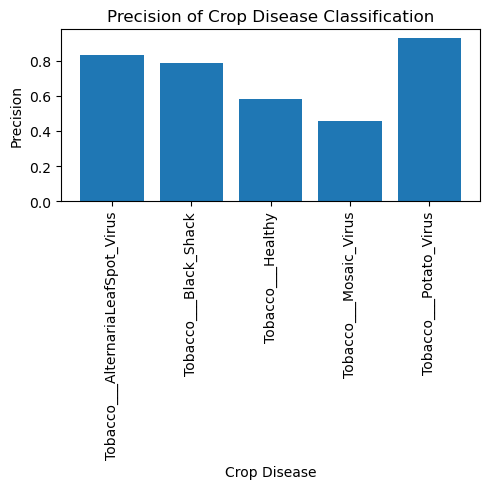

In [34]:
# Importing the Matplotlib library for data visualization.
import matplotlib.pyplot as plt
# Importing the classification_report function from Scikit-learn.
from sklearn.metrics import classification_report
class_names = validation_set.class_names
report = classification_report(Y_true, predicted_categories, target_names=class_names, output_dict=True)
precisions = [report[class_name]['precision'] for class_name in class_names]
plt.figure(figsize=(5, 5))
plt.bar(class_names, precisions)
plt.xticks(rotation=90)
plt.xlabel('Crop Disease')
plt.ylabel('Precision')
plt.title('Precision of Crop Disease Classification')
plt.tight_layout()
plt.show()

## CNN RECALL METRICS

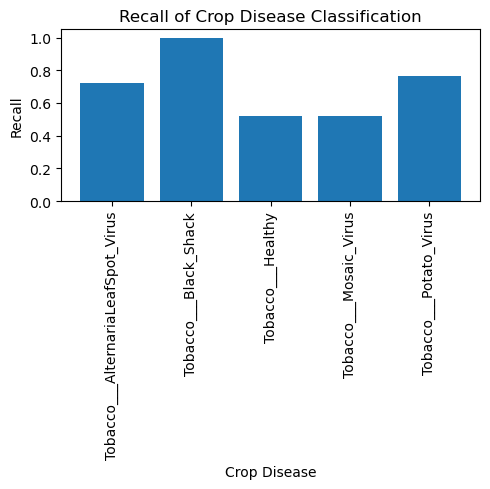

In [35]:
# Importing the Matplotlib library for data visualization.
import matplotlib.pyplot as plt
# Importing the classification_report function from Scikit-learn.
from sklearn.metrics import classification_report
class_names = validation_set.class_names
report = classification_report(Y_true, predicted_categories, target_names=class_names, output_dict=True)
recalls = [report[class_name]['recall'] for class_name in class_names]
plt.figure(figsize=(5, 5))
plt.bar(class_names, recalls)
plt.xticks(rotation=90)
plt.xlabel('Crop Disease')
plt.ylabel('Recall')
plt.title('Recall of Crop Disease Classification')
plt.tight_layout()
plt.show()

## CNN F1 SCORE METRICS

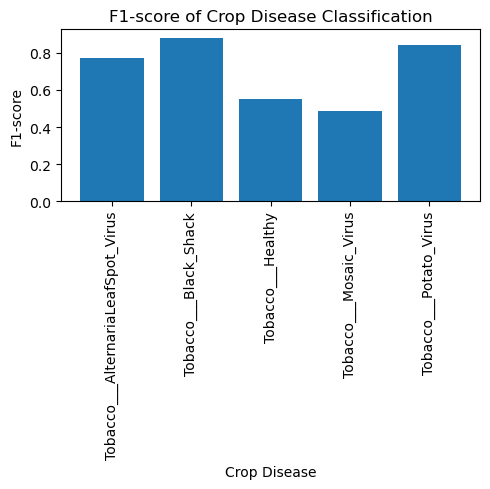

In [36]:
# Importing the Matplotlib library for data visualization.
import matplotlib.pyplot as plt
# Importing the classification_report function from Scikit-learn.
from sklearn.metrics import classification_report
class_names = validation_set.class_names
report = classification_report(Y_true, predicted_categories, target_names=class_names, output_dict=True)
f1_scores = [report[class_name]['f1-score'] for class_name in class_names]
plt.figure(figsize=(5, 5))
plt.bar(class_names, f1_scores)
plt.xticks(rotation=90)
plt.xlabel('Crop Disease')
plt.ylabel('F1-score')
plt.title('F1-score of Crop Disease Classification')
plt.tight_layout()
plt.show()

## CNN SUPPORT METRICS

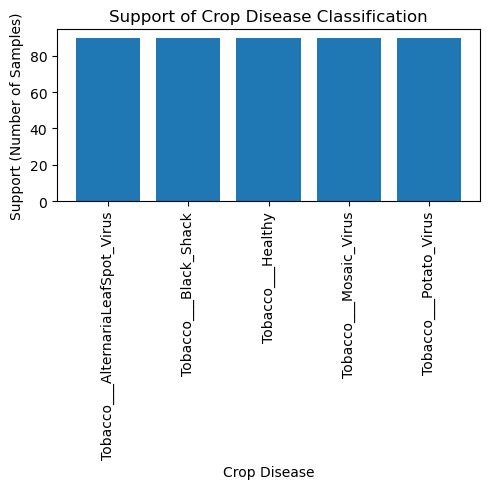

In [37]:
# Importing the Matplotlib library for data visualization.
import matplotlib.pyplot as plt
# Importing the classification_report function from Scikit-learn.
from sklearn.metrics import classification_report
class_names = validation_set.class_names
report = classification_report(Y_true, predicted_categories, target_names=class_names, output_dict=True)
supports = [report[class_name]['support'] for class_name in class_names]
plt.figure(figsize=(5, 5))
plt.bar(class_names, supports)
plt.xticks(rotation=90)
plt.xlabel('Crop Disease')
plt.ylabel('Support (Number of Samples)')
plt.title('Support of Crop Disease Classification')
plt.tight_layout()
plt.show()

## CNN CONFUSION MATRIX

<Figure size 800x600 with 0 Axes>

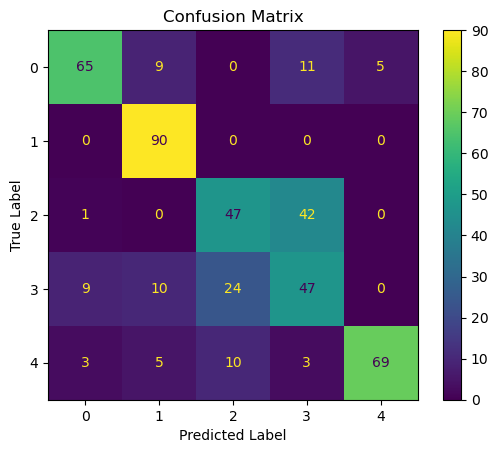

In [38]:
# Importing the confusion_matrix and ConfusionMatrixDisplay functions from Scikit-learn.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Importing the Matplotlib library for data visualization.
import matplotlib.pyplot as plt

# Get the true labels and the predicted labels

# Create a confusion matrix
cm = confusion_matrix(Y_true, predicted_categories)

# Create a figure and display the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## CNN PLOT MODEL ARCHITECTURE

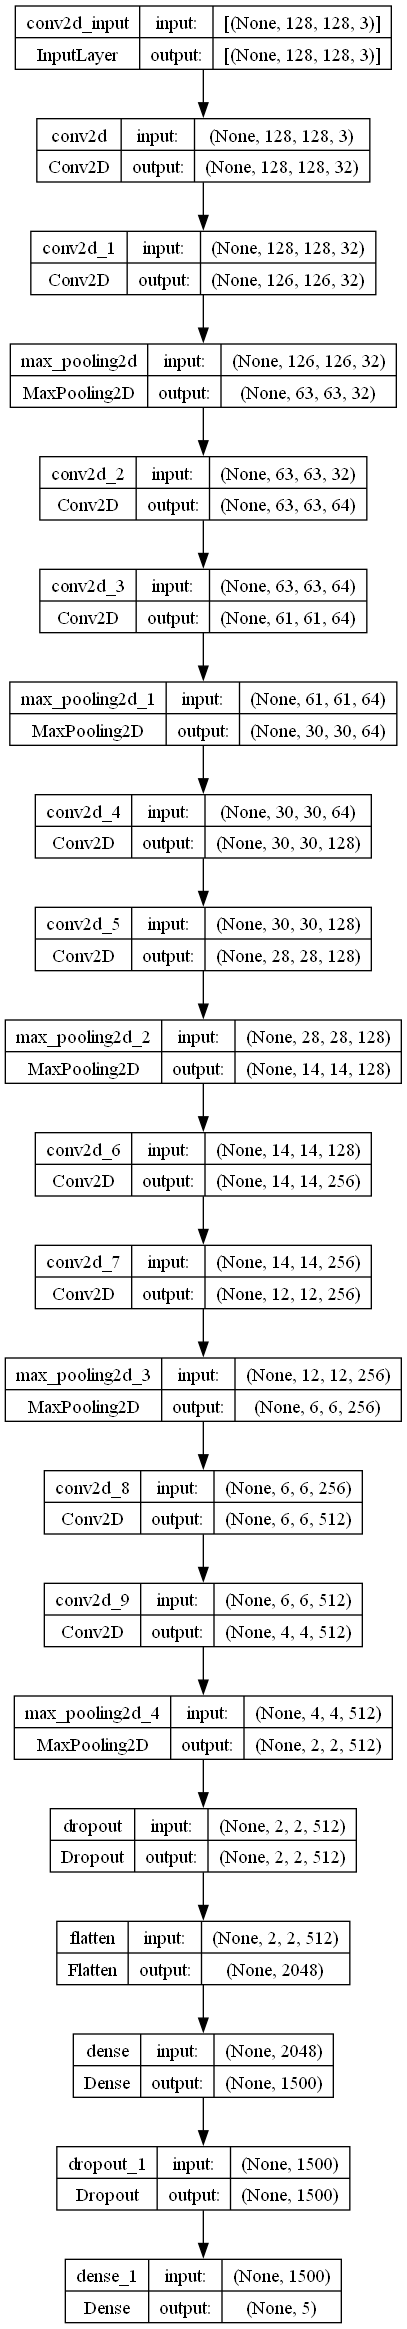

In [39]:
plot_model(cnn, show_shapes=True, show_layer_names=True, expand_nested=True)

In [40]:
## SEQUENTIAL MODEL ARCHITECTURE

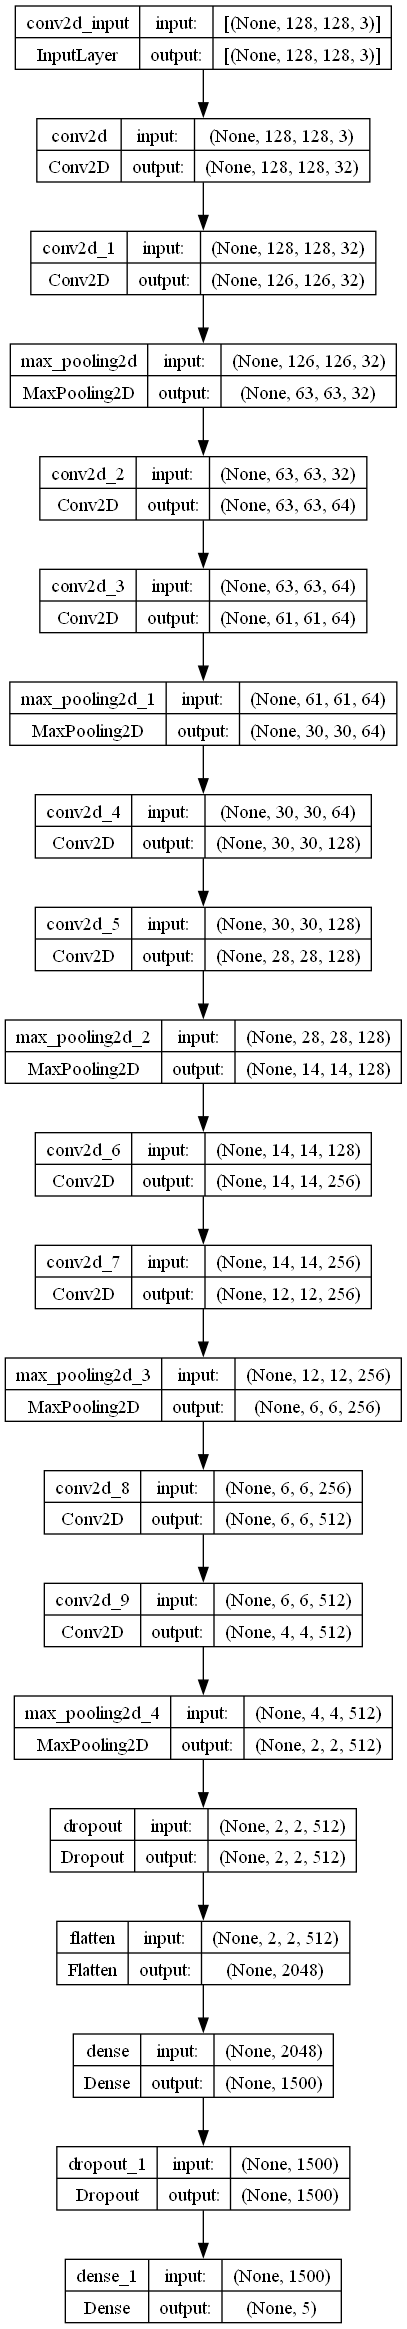

In [41]:
plot_model(cnn, to_file='model_architecture.png', show_shapes=True)

## ........................................CNN -SVM.............................................................................

## SVM FEATURE EXTRACTION AND TRAINING

## TRAINING SVM CLASSFIER

In [42]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from sklearn.svm import SVC
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer


In [43]:
# Extract features using the trained CNN model
feature_extractor = tf.keras.Model(inputs=cnn.input, outputs=cnn.layers[-4].output)

In [44]:
def extract_features(dataset):
    features = []
    labels = []
    for images, label_batch in dataset:
        feature_batch = feature_extractor.predict(images)
        features.append(feature_batch)
        labels.append(label_batch.numpy())
    return np.concatenate(features), np.concatenate(labels)

In [45]:
train_features, train_labels = extract_features(training_set)
valid_features, valid_labels = extract_features(validation_set)

1/1 [==============================] - 0s 78ms/step


In [46]:
# Flatten the features for the SVM
train_features = train_features.reshape(train_features.shape[0], -1)
valid_features = valid_features.reshape(valid_features.shape[0], -1)

In [47]:
# Convert labels to one-hot encoded format
lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels.argmax(axis=1))
valid_labels = lb.transform(valid_labels.argmax(axis=1))

In [48]:
# Define the SVM classifier with RBF kernel
svm = SVC(kernel='rbf', probability=True)

In [49]:
# Define the parameter search space for Bayesian optimization
param_space = {
    'C': Real(1e-6, 1e+6, prior='log-uniform'),
    'gamma': Real(1e-6, 1e+1, prior='log-uniform'),
    'kernel': Categorical(['rbf'])
}

In [50]:
# Define the Bayesian search
opt = BayesSearchCV(svm, param_space, n_iter=32, cv=3, n_jobs=-1, random_state=42)


In [51]:
# Perform the optimization
opt.fit(train_features, train_labels.argmax(axis=1))

BayesSearchCV(cv=3, estimator=SVC(probability=True), n_iter=32, n_jobs=-1,
              random_state=42,
              search_spaces={'C': Real(low=1e-06, high=1000000.0, prior='log-uniform', transform='normalize'),
                             'gamma': Real(low=1e-06, high=10.0, prior='log-uniform', transform='normalize'),
                             'kernel': Categorical(categories=('rbf',), prior=None)})

In [52]:
# Print the best parameters found
print("Best parameters: ", opt.best_params_)

Best parameters:  OrderedDict([('C', 7979.062941536535), ('gamma', 0.024300809332813086), ('kernel', 'rbf')])


In [53]:
# Train the SVM classifier with the best found parameters
best_svm = opt.best_estimator_
best_svm.fit(train_features, train_labels.argmax(axis=1))

SVC(C=7979.062941536535, gamma=0.024300809332813086, probability=True)

## SVM VALIDATION ACCURACY

In [54]:
# Predict on the validation set
valid_predictions = best_svm.predict(valid_features)

In [55]:


# Calculate the validation accuracy
valid_accuracy = accuracy_score(valid_labels.argmax(axis=1), valid_predictions)
print("Validation Accuracy: {:.2f}%".format(valid_accuracy * 100))

Validation Accuracy: 71.33%


## SVM TRAINING ACCURACY

In [56]:
# Predict on the training set
train_predictions = best_svm.predict(train_features)

In [57]:
# Calculate the training accuracy
train_accuracy = accuracy_score(train_labels.argmax(axis=1), train_predictions)
print("CNN -SVM Training Accuracy: {:.2f}%".format(train_accuracy * 100))


CNN -SVM Training Accuracy: 100.00%


## CNN -SVM CLASSIFICATION REPORT

In [58]:
from sklearn.metrics import accuracy_score, classification_report


In [59]:
# Generate and print classification report for training set
train_classification_report = classification_report(train_labels.argmax(axis=1), train_predictions, target_names=training_set.class_names)
print(" CNN-SVM Training Classification Report:\n", train_classification_report)

 CNN-SVM Training Classification Report:
                                     precision    recall  f1-score   support

Tobacco___AlternariaLeafSpot_Virus       1.00      1.00      1.00       339
             Tobacco___Black_Shack       1.00      1.00      1.00       339
                 Tobacco___Healthy       1.00      1.00      1.00       339
            Tobacco___Mosaic_Virus       1.00      1.00      1.00       339
            Tobacco___Potato_Virus       1.00      1.00      1.00       336

                          accuracy                           1.00      1692
                         macro avg       1.00      1.00      1.00      1692
                      weighted avg       1.00      1.00      1.00      1692



In [60]:
# Generate and print classification report for validation set
valid_classification_report = classification_report(valid_labels.argmax(axis=1), valid_predictions, target_names=validation_set.class_names)
print("Validation Classification Report:\n", valid_classification_report)

Validation Classification Report:
                                     precision    recall  f1-score   support

Tobacco___AlternariaLeafSpot_Virus       0.92      0.72      0.81        90
             Tobacco___Black_Shack       0.81      0.98      0.89        90
                 Tobacco___Healthy       0.61      0.40      0.48        90
            Tobacco___Mosaic_Virus       0.42      0.49      0.45        90
            Tobacco___Potato_Virus       0.82      0.98      0.89        90

                          accuracy                           0.71       450
                         macro avg       0.72      0.71      0.70       450
                      weighted avg       0.72      0.71      0.70       450



## SVM PRECISION METRICS

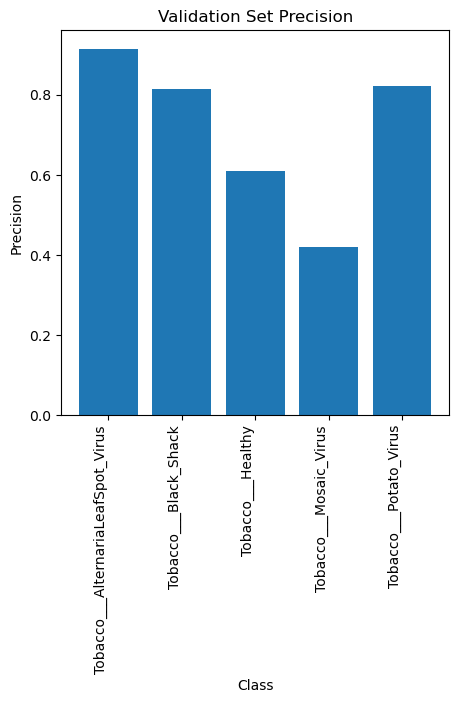

In [61]:
# Generate the classification report
valid_classification_report = classification_report(valid_labels.argmax(axis=1), valid_predictions, target_names=validation_set.class_names, output_dict=True)

# Extract the precision values
class_names = list(valid_classification_report.keys())[:-3]
precisions = [valid_classification_report[c]['precision'] for c in class_names]

# Create the bar graph
plt.figure(figsize=(5, 5))
plt.bar(class_names, precisions)
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Validation Set Precision')
plt.xticks(rotation=90, ha='right')
plt.show()

## SVM RECALL METRICS

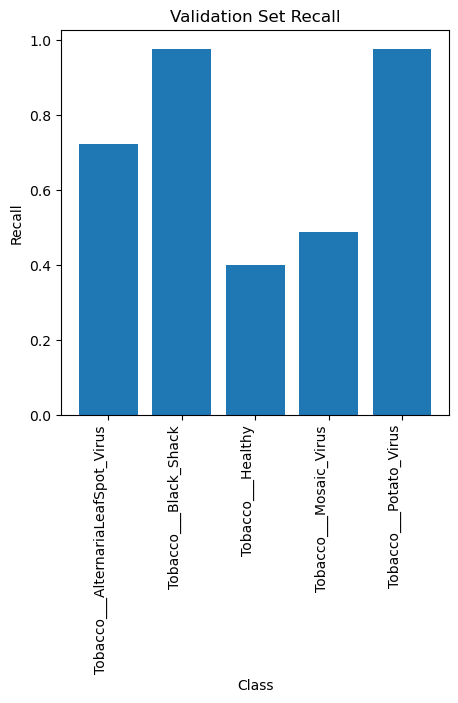

In [62]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Generate the classification report
valid_classification_report = classification_report(valid_labels.argmax(axis=1), valid_predictions, target_names=validation_set.class_names, output_dict=True)

# Extract the recall values
class_names = list(valid_classification_report.keys())[:-3]
recalls = [valid_classification_report[c]['recall'] for c in class_names]

# Create the bar graph
plt.figure(figsize=(5, 5))
plt.bar(class_names, recalls)
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Validation Set Recall')
plt.xticks(rotation=90, ha='right')
plt.show()

## SVM F1 SCORE METRICS

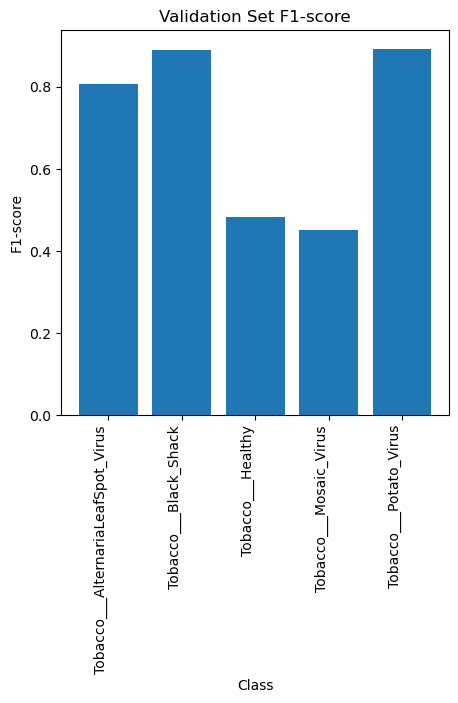

In [63]:
# Generate the classification report
valid_classification_report = classification_report(valid_labels.argmax(axis=1), valid_predictions, target_names=validation_set.class_names, output_dict=True)

# Extract the F1-score values
class_names = list(valid_classification_report.keys())[:-3]
f1_scores = [valid_classification_report[c]['f1-score'] for c in class_names]

# Create the bar graph
plt.figure(figsize=(5, 5))
plt.bar(class_names, f1_scores)
plt.xlabel('Class')
plt.ylabel('F1-score')
plt.title('Validation Set F1-score')
plt.xticks(rotation=90, ha='right')
plt.show()

## SVM SUPPORT METRICS

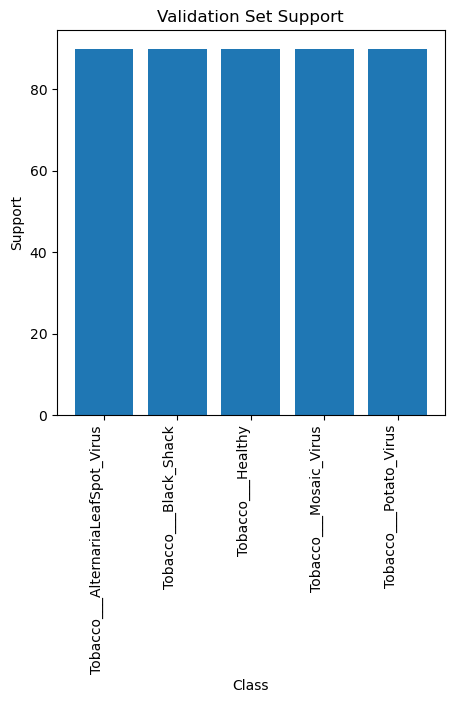

In [64]:
# Generate the classification report
valid_classification_report = classification_report(valid_labels.argmax(axis=1), valid_predictions, target_names=validation_set.class_names, output_dict=True)

# Extract the support values
class_names = list(valid_classification_report.keys())[:-3]
supports = [valid_classification_report[c]['support'] for c in class_names]

# Create the bar graph
plt.figure(figsize=(5, 5))
plt.bar(class_names, supports)
plt.xlabel('Class')
plt.ylabel('Support')
plt.title('Validation Set Support')
plt.xticks(rotation=90, ha='right')
plt.show()

## SVM CONFUSION MATRIX

## SAVE CNN -SVM

In [65]:
import joblib
# Save the trained SVM model
joblib.dump(svm, 'svm_model.pkl')

['svm_model.pkl']

Confusion Matrix:
 [[65  3  8  8  6]
 [ 1 88  0  0  1]
 [ 0  0 36 52  2]
 [ 4 17 15 44 10]
 [ 1  0  0  1 88]]


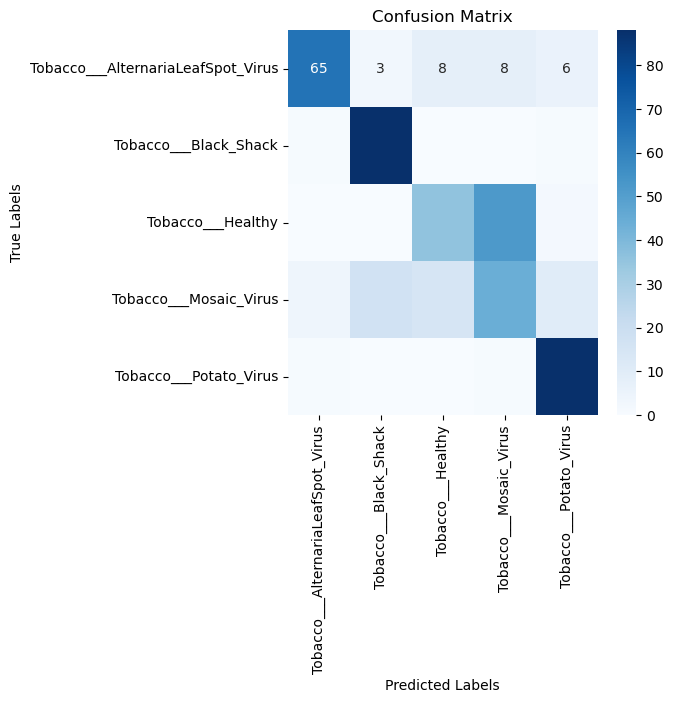

In [66]:
# Generate confusion matrix
conf_matrix = confusion_matrix(valid_labels.argmax(axis=1), valid_predictions)

# Print confusion matrix
print("Confusion Matrix:\n", conf_matrix)


# Visualize the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=validation_set.class_names, yticklabels=validation_set.class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [67]:
# Generate confusion matrix
conf_matrix = confusion_matrix(valid_labels.argmax(axis=1), valid_predictions)

# Print confusion matrix
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[65  3  8  8  6]
 [ 1 88  0  0  1]
 [ 0  0 36 52  2]
 [ 4 17 15 44 10]
 [ 1  0  0  1 88]]


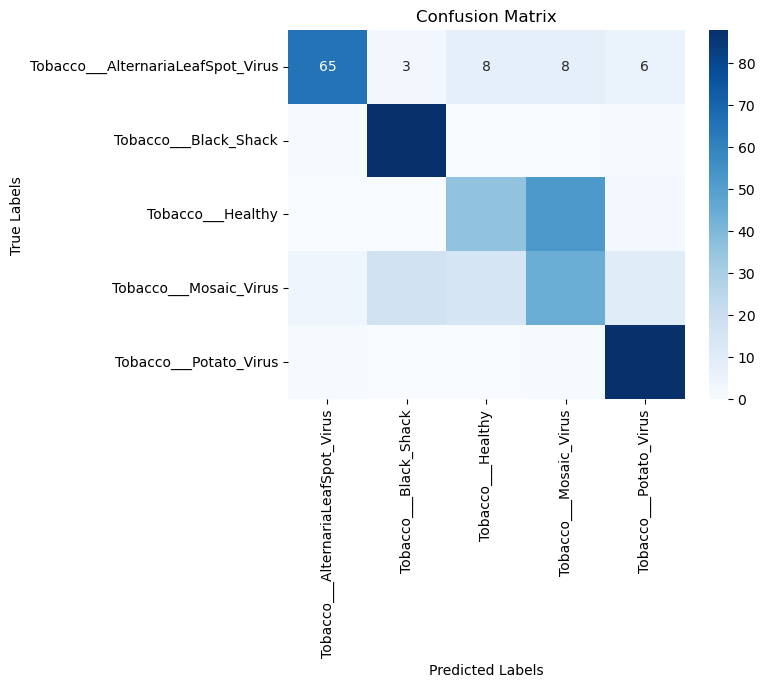

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(valid_labels.argmax(axis=1), valid_predictions)

# Visualize the confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=validation_set.class_names, yticklabels=validation_set.class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()